In [20]:
import pandas as pd
import torch
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, ConfusionMatrixDisplay

model = models.resnet18()
model.fc = torch.nn.Linear(model.fc.in_features, 2)
model.load_state_dict(torch.load("skin_cancer_resnet18_version1.pt", map_location='cpu'))
model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

In [22]:
def util_map(is_malignant):
    if is_malignant:
        return 1
    else:
        return 0

total = pd.read_csv('data/ddi_metadata.csv')
total['aux'] = total['malignant'].map(util_map)
skin_tones = {}
skin_tones[12] = total.query('skin_tone == 12')
skin_tones[34] = total.query('skin_tone == 34')
skin_tones[56] = total.query('skin_tone == 56')

In [28]:
def predict_all(df):
    y_pred = []
    y_test = []
    for row in df.to_dict(orient='records'):

        img = Image.open(f"data/{row['DDI_file']}").convert("RGB")
        input_tensor = transform(img).unsqueeze(0)

        with torch.no_grad():
            output = model(input_tensor)
            pred = torch.argmax(output, dim=1).item()
            
            y_pred.append(pred)
            y_test.append(row['aux'])
        
    print('\n---------------------------------------------------')
    print(f'General Accuracy = {accuracy_score(y_test, y_pred)}')
    print(f'General Precision = {precision_score(y_test, y_pred, average='macro')}')

    return confusion_matrix(y_test, y_pred, labels=[0, 1])


---------------------------------------------------
General Accuracy = 0.7057926829268293
General Precision = 0.577847384441141


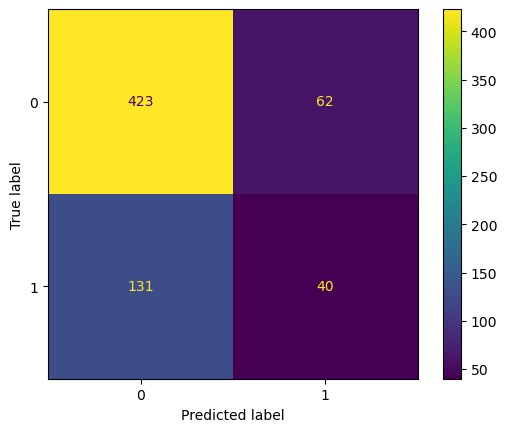

In [26]:
cm = predict_all(total)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()


---------------------------------------------------
General Accuracy = 0.7019230769230769
General Precision = 0.5659412881553966


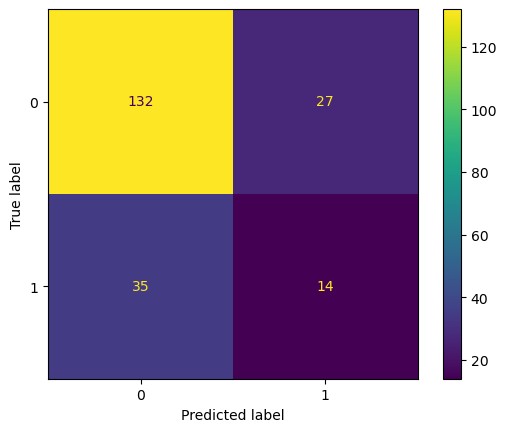

In [29]:
cm = predict_all(skin_tones[12])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()


---------------------------------------------------
General Accuracy = 0.6929460580912863
General Precision = 0.6134146341463415


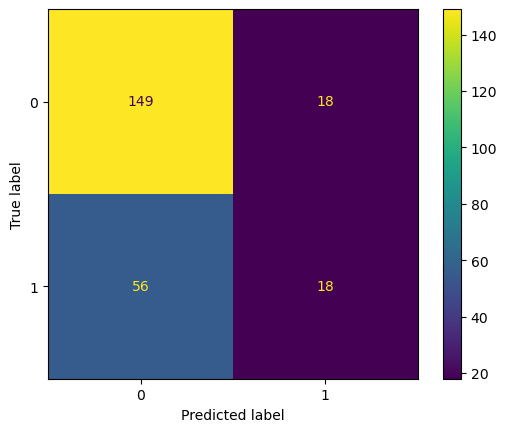

In [30]:
cm = predict_all(skin_tones[34])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()


---------------------------------------------------
General Accuracy = 0.7246376811594203
General Precision = 0.5501098901098901


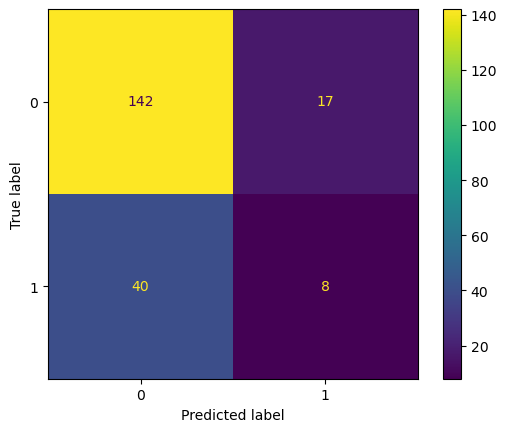

In [31]:
cm = predict_all(skin_tones[56])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()